<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/LSTM%EB%82%B4%EB%B6%80%EC%A0%80%ED%95%AD_%EB%AA%A8%EB%8D%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers, Sequential
from keras.layers import RNN
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
forecasting = 20

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [ ]:
df = df.drop(['CellNo', 'MeasuredDate'], axis=1)
df

,Resistance,Volt,Temp
0,0.259,2.23,-20
1,0.260,2.23,-20
2,0.259,2.23,-20
3,0.259,2.23,-20
4,0.259,2.23,-20
...,...,...,...
254,0.301,2.23,-20
255,0.301,2.23,-20
256,0.302,2.23,-20
257,0.300,2.23,-20


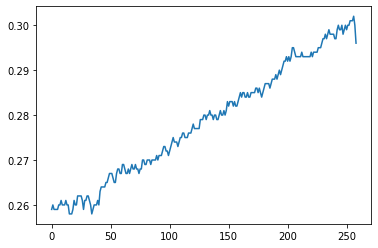

In [ ]:
df['Resistance'].plot()
train = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

     Volt  Temp  Resistance
0     0.0   0.0    0.022727
1     0.0   0.0    0.045455
2     0.0   0.0    0.022727
3     0.0   0.0    0.022727
4     0.0   0.0    0.022727
..    ...   ...         ...
254   0.0   0.0    0.977273
255   0.0   0.0    0.977273
256   0.0   0.0    1.000000
257   0.0   0.0    0.954545
258   0.0   0.0    0.863636

[259 rows x 3 columns]


In [ ]:
train = df_scaled

In [ ]:
def make_dataset(data, label, window_size=forecasting):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

train_feature = train[feature_cols]
train_label = train[label_cols]
# test_feature = test[feature_cols]
# test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, forecasting)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)


In [ ]:
model = Sequential()
model.add(LSTM(30, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model.add(LSTM(30,
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(3))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/Users/wlsrm/data', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

h = model.fit(x_train, y_train, 
                    epochs=1000, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid))

Epoch 1/1000
12/12 [==============================] - 3s 55ms/step - loss: 0.2938 - mse: 0.2938 - val_loss: 0.2462 - val_mse: 0.2462
Epoch 2/1000
12/12 [==============================] - 0s 21ms/step - loss: 0.1815 - mse: 0.1815 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 3/1000
12/12 [==============================] - 0s 20ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 4/1000
12/12 [==============================] - 0s 22ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 5/1000
12/12 [==============================] - 0s 20ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/1000
12/12 [==============================] - 0s 19ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/1000
12/12 [==============================] - 0s 21ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/1000
12/12 [==============================] - 0s 23ms/step - 

Test Score:  [0.007461166474968195, 0.007461166474968195]


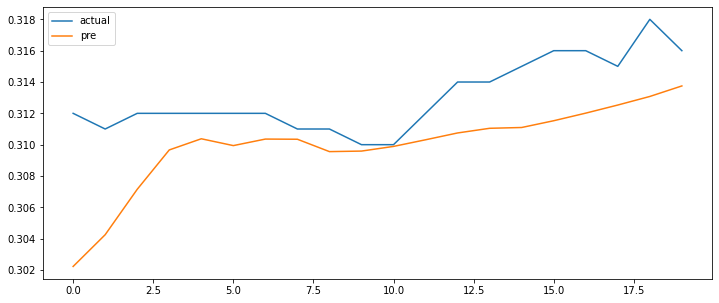

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.011955582536756992, 0.011955582536756992]


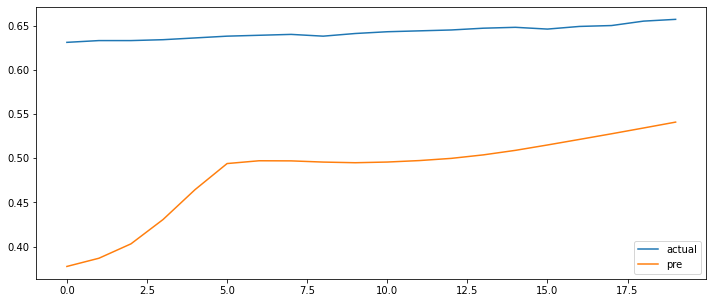

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.022728215903043747, 0.022728215903043747]


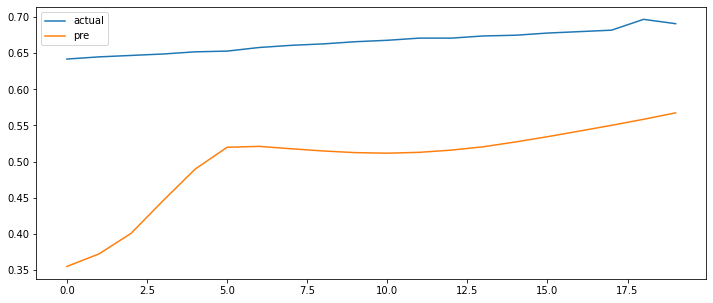

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.003895403817296028, 0.003895403817296028]


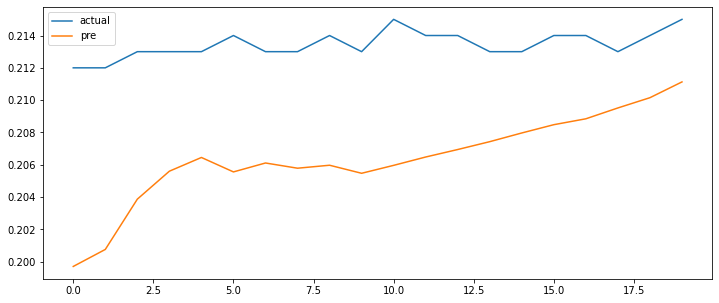

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.0371500626206398, 0.0371500626206398]


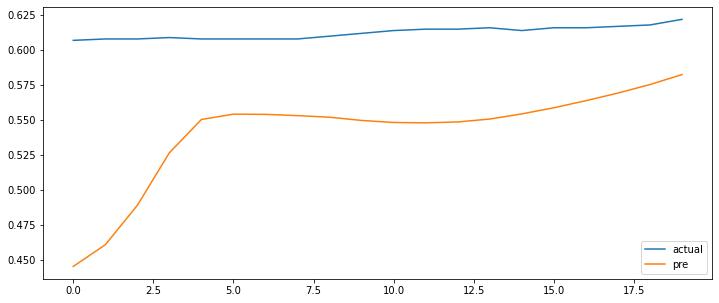

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.003283984027802944, 0.003283984027802944]


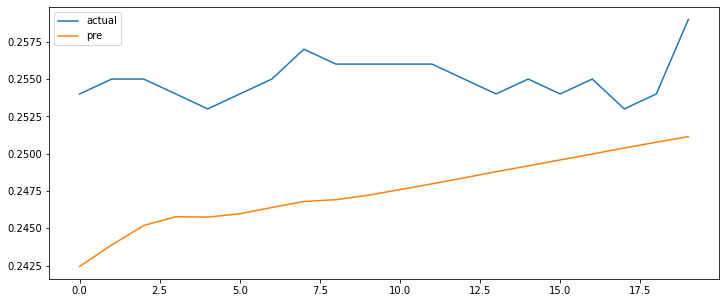

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)

look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.00959754642099142, 0.00959754642099142]


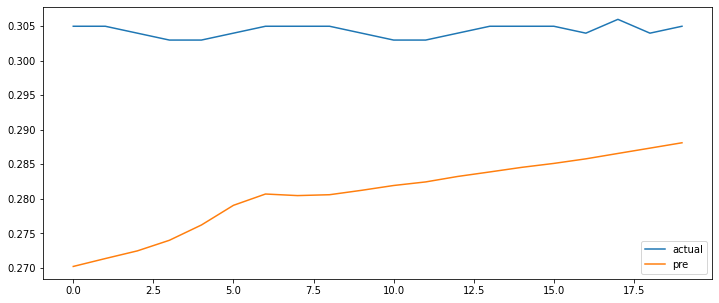

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.032475546002388, 0.032475546002388]


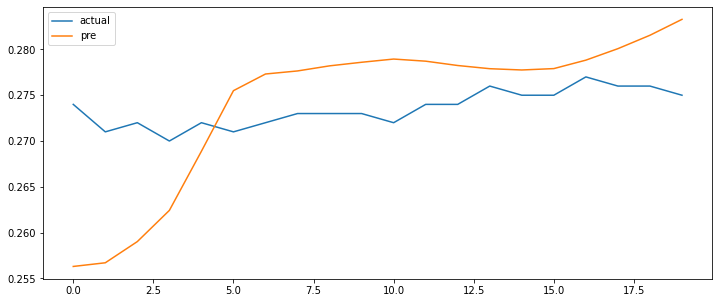

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')
# print(test_df)
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
# print(test_label[-6:])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()

Test Score:  [0.003065067809075117, 0.003065067809075117]


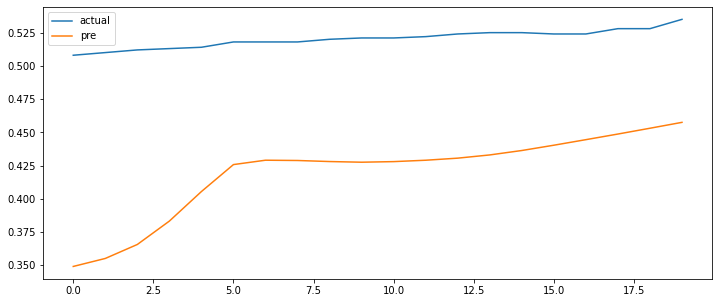

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')

scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(test_df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

test = df_scaled
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test, seq
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, forecasting)
look_ahead=forecasting
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])

label = test_df[label_cols].values

pred2 = scaler.inverse_transform(predictions)
pred2 = pred2[:, 2]
# pred2
# pred2 = predictions[:,2]
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

plt.figure(figsize=(12,5))
plt.plot(label[-forecasting:],label="actual")
plt.plot(pred2,label="pre")
# plt.ylim(0,1)
plt.legend()
plt.show()